<a href="https://colab.research.google.com/github/Rish-5k/RishRepository/blob/main/River%20Water%20Quality%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


df = pd.read_csv('river-historical-1986_2020-en.csv', low_memory=False)
df = df[pd.notnull(df['River'])]
df = df[[
    'Water Control Zone',
    'River',
    'Station',
    'Dates',
    'Turbidity (NTU)',
    'Suspended solids (mg/L)',
    'Dissolved Oxygen (mg/L)',
    '5-Day Biochemical Oxygen Demand (mg/L)',
    'Chemical Oxygen Demand (mg/L)',
    'Total Organic Carbon (mg/L)',
    'Total Phosphorus (mg/L)',
    'Total Kjeldahl Nitrogen (mg/L)',
    'Faecal Coliforms (counts/100mL)']]

df = df.rename(columns={
    'Water Control Zone': 'water_control_zone',
    'River': 'river',
    'Station': 'station',
    'Dates': 'dates',
    'Sample No': 'sample_no',
    'Turbidity (NTU)': 'turbidity_ntu',
    'Suspended solids (mg/L)': 'ss',
    'Dissolved Oxygen (mg/L)': 'dissolved_oxygen',
    '5-Day Biochemical Oxygen Demand (mg/L)': 'bod5',
    'Chemical Oxygen Demand (mg/L)': 'cod',
    'Total Organic Carbon (mg/L)': 't_carbon',
    'Total Phosphorus (mg/L)': 't_phosphorus',
    'Total Kjeldahl Nitrogen (mg/L)': 't_nitrogen',
    'Faecal Coliforms (counts/100mL)': 'faecal_coliform',
})


def cleanup(column):
    return pd.to_numeric(column.replace(['<', '>'], '', regex=True))


df['dates'] = pd.to_datetime(df['dates'], format="%Y-%m-%d")
# df['t_phosphorus'] = df['t_phosphorus'].apply(lambda x: 0.01 if pd.isnull(x) else x)
# df['t_nitrogen'] = df['t_nitrogen'].apply(lambda x: 0.04 if pd.isnull(x) else x)

df['ss'] = cleanup(df['ss'])
df['bod5'] = cleanup(df['bod5'])
df['cod'] = cleanup(df['cod'])
df['t_carbon'] = cleanup(df['t_carbon'])
df['t_phosphorus'] = cleanup(df['t_phosphorus'])
df['t_nitrogen'] = cleanup(df['t_nitrogen'])
df['faecal_coliform'] = cleanup(df['faecal_coliform'])


# df = df.loc[(df['dates'] >= '2000-12-02') & (df['dates'] <= '2020-12-02')]

try:
    df = df.fillna(df.ffill() / df.bfill())
except:
    pass

# print null
print(df.isnull().sum())


def calculate_wqi(T, SS, DO, BOD5, COD, C, NH3N, P, FC):

    T_points = 0
    SS_points = 0
    DO_points = 0
    BOD5_points = 0
    COD_points = 0
    C_points = 0
    NH3N_points = 0
    P_points = 0
    FC_points = 0

    if T <= 1.5:
        T_points = 10
    elif T > 1.5 and T <= 3.0:
        T_points = 20
    elif T > 3.0 and T <= 4.0:
        T_points = 30
    elif T > 4.0 and T <= 4.5:
        T_points = 40
    elif T > 4.5 and T <= 5.2:
        T_points = 50
    elif T > 5.2 and T <= 8.8:
        T_points = 60
    elif T > 8.8 and T <= 12.2:
        T_points = 70
    elif T > 12.2 and T <= 16.5:
        T_points = 80
    elif T > 16.5 and T <= 21:
        T_points = 90
    else:
        T_points = 100

    if SS <= 2:
        SS_points = 10
    elif SS > 2 and SS <= 3:
        SS_points = 20
    elif SS > 3 and SS <= 4:
        SS_points = 30
    elif SS > 4 and SS <= 5.5:
        SS_points = 40
    elif SS > 5.5 and SS <= 6.5:
        SS_points = 50
    elif SS > 6.5 and SS <= 9.5:
        SS_points = 60
    elif SS > 9.5 and SS <= 12.5:
        SS_points = 70
    elif SS > 12.5 and SS <= 18:
        SS_points = 80
    elif SS > 18 and SS <= 26.5:
        SS_points = 90
    else:
        SS_points = 100

    if DO >= 8:
        DO_points = 10
    elif DO < 8 and DO >= 7.3:
        DO_points = 20
    elif DO < 7.3 and DO >= 6.7:
        DO_points = 30
    elif DO < 6.7 and DO >= 6.3:
        DO_points = 40
    elif DO < 6.3 and DO >= 5.8:
        DO_points = 50
    elif DO < 5.8 and DO >= 5.3:
        DO_points = 60
    elif DO < 5.3 and DO >= 4.8:
        DO_points = 70
    elif DO < 4.8 and DO >= 4:
        DO_points = 80
    elif DO < 4 and DO >= 3.1:
        DO_points = 90
    else:
        DO_points = 100

    if BOD5 <= 0.8:
        BOD5_points = 10
    elif BOD5 > 0.8 and BOD5 <= 1:
        BOD5_points = 20
    elif BOD5 > 1.0 and BOD5 <= 1.1:
        BOD5_points = 30
    elif BOD5 > 1.1 and BOD5 <= 1.3:
        BOD5_points = 40
    elif BOD5 > 1.3 and BOD5 <= 1.5:
        BOD5_points = 50
    elif BOD5 > 1.5 and BOD5 <= 1.9:
        BOD5_points = 60
    elif BOD5 > 1.9 and BOD5 <= 2.3:
        BOD5_points = 70
    elif BOD5 > 2.3 and BOD5 <= 3.3:
        BOD5_points = 80
    elif BOD5 > 3.3 and BOD5 <= 5.1:
        BOD5_points = 90
    elif BOD5 > 5.1:
        BOD5_points = 100

    if COD <= 16:
        COD_points = 10
    elif COD > 16 and COD <= 24:
        COD_points = 20
    elif COD > 24 and COD <= 32:
        COD_points = 30
    elif COD > 32 and COD <= 38:
        COD_points = 40
    elif COD > 38 and COD <= 46:
        COD_points = 50
    elif COD > 46 and COD <= 58:
        COD_points = 60
    elif COD > 58 and COD <= 72:
        COD_points = 70
    elif COD > 72 and COD <= 102:
        COD_points = 80
    elif COD > 102 and COD <= 146:
        COD_points = 90
    elif COD > 146:
        COD_points = 100

    if C <= 5:
        C_points = 10
    elif C > 5 and C <= 7:
        C_points = 20
    elif C > 7 and C <= 9.5:
        C_points = 30
    elif C > 9.5 and C <= 12:
        C_points = 40
    elif C > 12 and C <= 14:
        C_points = 50
    elif C > 14 and C <= 17.5:
        C_points = 60
    elif C > 17.5 and C <= 21:
        C_points = 70
    elif C > 21 and C <= 27.5:
        C_points = 80
    elif C > 27.5 and C <= 37:
        C_points = 90
    elif C > 37:
        C_points = 100

    if NH3N <= 0.55:
        NH3N_points = 10
    elif NH3N > 0.55 and NH3N <= 0.75:
        NH3N_points = 20
    elif NH3N > 0.75 and NH3N <= 0.9:
        NH3N_points = 30
    elif NH3N > 0.9 and NH3N <= 1:
        NH3N_points = 40
    elif NH3N > 1 and NH3N <= 1.2:
        NH3N_points = 50
    elif NH3N > 1.2 and NH3N <= 1.4:
        NH3N_points = 60
    elif NH3N > 1.4 and NH3N <= 1.6:
        NH3N_points = 70
    elif NH3N > 1.6 and NH3N <= 2:
        NH3N_points = 80
    elif NH3N > 2 and NH3N <= 2.7:
        NH3N_points = 90
    elif NH3N > 2.7:
        NH3N_points = 100

    if P <= 0.02:
        P_points = 10
    elif P > 0.02 and P <= 0.03:
        P_points = 20
    elif P > 0.03 and P <= 0.05:
        P_points = 30
    elif P > 0.05 and P <= 0.07:
        P_points = 40
    elif P > 0.07 and P <= 0.09:
        P_points = 50
    elif P > 0.09 and P <= 0.16:
        P_points = 60
    elif P > 0.16 and P <= 0.24:
        P_points = 70
    elif P > 0.24 and P <= 0.46:
        P_points = 80
    elif P > 0.46 and P <= 0.89:
        P_points = 90
    elif P > 0.89:
        P_points = 100

    if FC <= 10:
        FC_points = 10
    elif FC > 10 and FC <= 20:
        FC_points = 20
    elif FC > 20 and FC <= 35:
        FC_points = 30
    elif FC > 35 and FC <= 55:
        FC_points = 40
    elif FC > 55 and FC <= 75:
        FC_points = 50
    elif FC > 75 and FC <= 135:
        FC_points = 60
    elif FC > 135 and FC <= 190:
        FC_points = 70
    elif FC > 190 and FC <= 470:
        FC_points = 80
    elif FC > 470 and FC <= 960:
        FC_points = 90
    elif FC > 960:
        FC_points = 100

    # if FC:
    #     WQI = (T_points + SS_points + DO_points + BOD5_points + COD_points + C_points + NH3N_points + P_points + FC_points)/9
    # else:
    #     WQI = (T_points + SS_points + DO_points + BOD5_points + COD_points + C_points + NH3N_points + P_points)/8

    WQI = (T_points + SS_points + DO_points + BOD5_points +
           COD_points + C_points + NH3N_points + P_points + FC_points)/9

    return WQI


df['WQI'] = df.apply(lambda x: calculate_wqi(x['turbidity_ntu'], x['ss'], x['dissolved_oxygen'],
                                             x['bod5'], x['cod'], x['t_carbon'], x['t_nitrogen'],
                                             x['t_phosphorus'], x['faecal_coliform']), axis=1)

# if there are multiple samples per week, take the median
# df_weekly = df
# df_weekly['week'] = df_weekly['dates'].dt.week
# df_weekly['year'] = df_weekly['dates'].dt.year
# df_weekly = df.groupby(['river', 'year', 'week']).median().reset_index()

# river list
rivers = []
for river in pd.unique(df.river):
    rivers.append(df.loc[df['river'].isin([river])])

# river dict to access river by name
riverdict = {}
for river in rivers:
    riverdict[river['river'].unique()[0]] = river

# sort both by date
for river in rivers:
    river.sort_values(by='dates', inplace=True)

for river in riverdict:
    riverdict[river].sort_values(by='dates', inplace=True)


water_control_zone       0
river                    0
station                  0
dates                    0
turbidity_ntu           12
ss                      11
dissolved_oxygen         4
bod5                   116
cod                     12
t_carbon               180
t_phosphorus            13
t_nitrogen              14
faecal_coliform       6503
dtype: int64


C:\Users\Aapo\AppData\Local\Temp\ipykernel_21052\2187955634.py:302: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  river.sort_values(by='dates', inplace=True)
C:\Users\Aapo\AppData\Local\Temp\ipykernel_21052\2187955634.py:305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riverdict[river].sort_values(by='dates', inplace=True)


In [ ]:
# Here using only Tsen Lan Shue Stream

riverm = riverdict["Tseng Lan Shue Stream"]
riverm.dates = pd.to_datetime(riverm.dates)
try:
    riverm.drop(['water_control_zone', 'river', 'station'], axis=1, inplace=True)
except:
    print('no water_control_zone, river, station columns')
riverm = riverm.loc[riverm['dates'] >= '2000-01-01']

# extract the seasonality data
months = [x.month for x in riverm.dates]
years = [x.year for x in riverm.dates]
day = [x.day for x in riverm.dates]

# convert into one matrix
X = np.array([day, months, years]).T


C:\Users\Aapo\AppData\Local\Temp\ipykernel_21052\1791852050.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riverm.dates = pd.to_datetime(riverm.dates)
C:\Users\Aapo\AppData\Local\Temp\ipykernel_21052\1791852050.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riverm.drop(['water_control_zone', 'river', 'station'], axis=1, inplace=True)


In [ ]:
rivermtemp = riverm.copy()
rivermtemp['year'] = rivermtemp['dates'].dt.year
rivermtemp['month'] = rivermtemp['dates'].dt.month
rivermtemp['day'] = rivermtemp['dates'].dt.day

# creating a new dataframe with the median values of each month

# rivermedian = rivermtemp.groupby(['year', 'month', 'day']).median().reset_index()
rivermedian = rivermtemp.groupby(['year', 'month']).median().reset_index()

# make a new column dates to rivermedian
rivermedian['dates'] = pd.to_datetime(rivermedian[['year', 'month']].assign(DAY=1))
rivermedian

,year,month,turbidity_ntu,ss,dissolved_oxygen,bod5,cod,t_carbon,t_phosphorus,t_nitrogen,faecal_coliform,WQI,day,dates
0,2000,1,10.7,3.6,5.9,14.0,30.0,9.0,1.80,12.00,780000.0,70.000000,6.0,2000-01-01
1,2000,2,8.0,3.9,8.0,12.0,23.0,9.0,1.70,9.70,350000.0,63.333333,10.0,2000-02-01
2,2000,3,16.4,16.0,6.5,18.0,41.0,13.0,1.90,8.60,27000.0,77.777778,24.0,2000-03-01
3,2000,4,16.4,22.0,6.4,8.0,25.0,5.0,0.89,4.80,220000.0,77.777778,19.0,2000-04-01
4,2000,5,10.2,4.2,6.2,8.6,21.0,6.0,0.64,4.10,73000.0,68.888889,24.0,2000-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2020,7,1.0,2.0,7.3,1.4,8.0,3.0,0.61,6.50,18000.0,40.000000,10.0,2020-07-01
245,2020,9,3.1,2.7,7.7,1.0,7.0,2.0,0.23,0.39,50000.0,31.111111,14.0,2020-09-01
246,2020,10,2.8,4.0,7.7,6.4,16.0,5.0,0.37,0.73,18000.0,43.333333,17.0,2020-10-01
247,2020,11,2.4,6.4,7.6,5.8,15.0,5.0,0.66,1.20,97000.0,51.111111,23.0,2020-11-01


In [ ]:
rivermedian.dtypes

year                         int64
month                        int64
turbidity_ntu              float64
ss                         float64
dissolved_oxygen           float64
bod5                       float64
cod                        float64
t_carbon                   float64
t_phosphorus               float64
t_nitrogen                 float64
faecal_coliform            float64
WQI                        float64
day                        float64
dates               datetime64[ns]
dtype: object

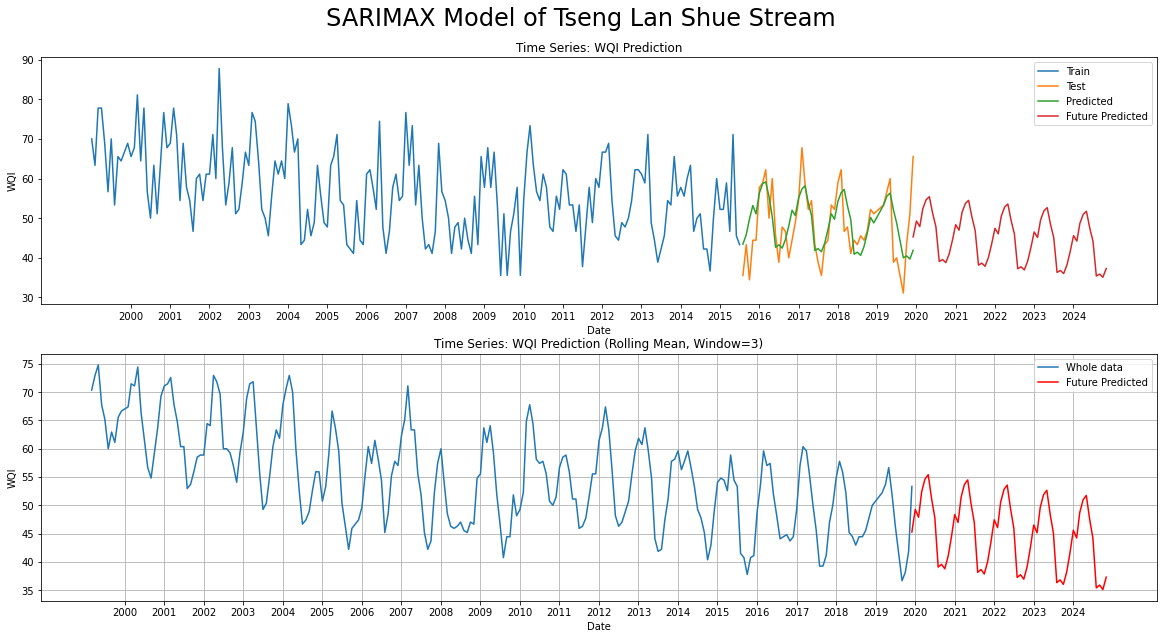

Mean Squared Error: 46.048816922984294


In [ ]:
from matplotlib import dates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

rivermedian['dates'] = pd.to_datetime(rivermedian['dates'])
rivermedian = rivermedian.sort_values('dates')

# splitting the data into train and test
train_size = int(len(rivermedian) * 0.8)
train_data = rivermedian.iloc[:train_size]
test_data = rivermedian.iloc[train_size:]

# SARIMA model configuration
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, s)

# training
model = SARIMAX(train_data['WQI'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# predictions
predictions = model_fit.forecast(steps=len(test_data))

# predicting for the next 5 years
n_years = 5
n_months = n_years * 12
future_predictions = model_fit.forecast(steps=len(test_data) + n_months)

# preparing dates for the next 5 years
last_date = rivermedian['dates'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=n_months, freq='MS')

# plotting
fig, ax = plt.subplots(2, 1)
fig.set_size_inches(20, 10)

# ax[0].figure(figsize=(14, 6))
ax[0].plot(train_data['dates'], train_data['WQI'], label='Train')
ax[0].plot(test_data['dates'], test_data['WQI'], label='Test')
ax[0].plot(test_data['dates'], predictions, label='Predicted')
ax[0].plot(future_dates, future_predictions[-n_months:], label='Future Predicted')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('WQI')
ax[0].set_title('Time Series: WQI Prediction')
ax[0].legend()
ax[0].set_xticks(pd.date_range(start=riverm['dates'].min(), end=future_dates.max(), freq='Y'))
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%Y'))

# rolling mean plot
rolling_window = 3

ax[1].plot(rivermedian.dates, rivermedian['WQI'].rolling(rolling_window).mean(), label='Whole data')
ax[1].plot(future_dates, future_predictions[-n_months:], label='Future Predicted', color='red')

ax[1].set_xlabel('Date')
ax[1].set_ylabel('WQI')
ax[1].set_xticks(pd.date_range(start=riverm['dates'].min(), end=future_dates.max(), freq='Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%Y'))

# rotate xticks
# ax[1].tick_params(axis='x', rotation=45)
# set grid
ax[1].grid()
ax[1].set_title(
    f'Time Series: WQI Prediction (Rolling Mean, Window={rolling_window})')
ax[1].legend()

fig.suptitle(f'SARIMAX Model of Tseng Lan Shue Stream', fontsize=24, y=0.95)
plt.show()

# evaluation
mse = mean_squared_error(test_data['WQI'], predictions)
print("Mean Squared Error:", mse)



In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

import numpy as np

from sklearn.model_selection import GridSearchCV

def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    #df['hour'] = df.dates.dt.hour.astype(int)
    #df['dayofweek'] = df.dates.dt.dayofweek.astype(int)
    #df['quarter'] = df.dates.dt.quarter.astype(int)
    df['month'] = df.dates.dt.month.astype(int)
    df['year'] = df.dates.dt.year.astype(int)
    #df['dayofyear'] = df.dates.dt.dayofyear.astype(int)
    #df['dayofmonth'] = df.dates.dt.day.astype(int)
    #df['weekofyear'] = df.dates.dt.isocalendar().week.astype(int)
    return df.drop(columns=['dates'])

riverm['dates'] = pd.to_datetime(riverm['dates'])
riverm = riverm.sort_values('dates')

# splitting the data into train and test
train_size = int(len(riverm) * 0.8)
train_data = riverm.iloc[:train_size]
test_data = riverm.iloc[train_size:]

# separating the features and the target
X_train = create_features(train_data[['dates']])
y_train = train_data[['turbidity_ntu']]
X_test = create_features(test_data[['dates']])
y_test = test_data[['turbidity_ntu']]

y2 = train_data[['ss']]
yy2 = test_data[['ss']]

y3 = train_data[['dissolved_oxygen']]
yy3 = test_data[['dissolved_oxygen']]

y4 = train_data[['bod5']]
yy4 = test_data[['bod5']]

y5 = train_data[['cod']]
yy5 = test_data[['cod']]

y6 = train_data[['t_carbon']]
yy6 = test_data[['t_carbon']]

y7 = train_data[['t_phosphorus']]
yy7 = test_data[['t_phosphorus']]

y8 = train_data[['t_nitrogen']]
yy8 = test_data[['t_nitrogen']]

y9 = train_data[['faecal_coliform']]
yy9 = test_data[['faecal_coliform']]

y10 = train_data[['WQI']]
yy10 = test_data[['WQI']]

model = xgb.XGBRegressor(objective='reg:squarederror',
                         n_estimators=1000,
                         learning_rate=0.05,
                         max_depth=3)
model.fit(X_train, y_train)

model2 = xgb.XGBRegressor(objective='reg:squarederror',
                         n_estimators=1000,
                         learning_rate=0.05,
                         max_depth=3)
model2.fit(X_train, y2)

model3 = xgb.XGBRegressor(objective='reg:squarederror',
                         n_estimators=1000,
                         learning_rate=0.05,
                         max_depth=3)
model3.fit(X_train, y3)

model4 = xgb.XGBRegressor(objective='reg:squarederror',
                         n_estimators=1000,
                         learning_rate=0.05,
                         max_depth=3)
#model4.fit(X_train, train_data['bod5'])

model5 = xgb.XGBRegressor(objective='reg:squarederror',
                         n_estimators=1000,
                         learning_rate=0.05,
                         max_depth=3)
model5.fit(X_train, y5)

model6 = xgb.XGBRegressor(objective='reg:squarederror',
                         n_estimators=1000,
                         learning_rate=0.05,
                         max_depth=3)
model6.fit(X_train, y6)

model7 = xgb.XGBRegressor(objective='reg:squarederror',
                         n_estimators=1000,
                         learning_rate=0.05,
                         max_depth=3)
model7.fit(X_train, y7)

model8 = xgb.XGBRegressor(objective='reg:squarederror',
                         n_estimators=1000,
                         learning_rate=0.05,
                         max_depth=3)
model8.fit(X_train, y8)

model9 = xgb.XGBRegressor(objective='reg:squarederror',
                         n_estimators=1000,
                         learning_rate=0.05,
                         max_depth=3)
model9.fit(X_train, y9)

model10 = xgb.XGBRegressor(objective='reg:squarederror',
                         n_estimators=1000,
                         learning_rate=0.05,
                         max_depth=3)
model10.fit(X_train, y10)

predictions = model.predict(X_test)
predictions2 = model2.predict(X_test)
predictions3 = model3.predict(X_test)
# predictions4 = model4.predict(X_test)
predictions5 = model5.predict(X_test)
predictions6 = model6.predict(X_test)
predictions7 = model7.predict(X_test)
predictions8 = model8.predict(X_test)
predictions9 = model9.predict(X_test)
predictions10 = model10.predict(X_test)

mse = mean_squared_error(y_test, predictions, squared=False)
print("rMean Squared Error:", mse)

mse = mean_squared_error(yy2, predictions2, squared=False)
print("rMean Squared Error:", mse)
mse = mean_squared_error(yy3, predictions3, squared=False)
print("rMean Squared Error:", mse)
# mse = mean_squared_error(yy4, predictions4)
# print("Mean Squared Error:", mse)
mse = mean_squared_error(yy5, predictions5, squared=False)
print("rMean Squared Error:", mse)
mse = mean_squared_error(yy6, predictions6, squared=False)
print("rMean Squared Error:", mse)
mse = mean_squared_error(yy7, predictions7, squared=False)
print("rMean Squared Error:", mse)
mse = mean_squared_error(yy8, predictions8, squared=False)
print("rMean Squared Error:", mse)
mse = mean_squared_error(yy9, predictions9, squared=False)
print("rMean Squared Error:", mse)
mse = mean_squared_error(yy10, predictions10, squared=False)
print("rMean Squared Error WQI:", mse)

temp = pd.DataFrame((predictions, predictions2, predictions3,
                                             test_data['bod5'], predictions5, predictions6, predictions7,
                                             predictions8, predictions9)).T

print(temp)
print("Calculated WQI", temp.apply(lambda x: calculate_wqi(x[0], x[1], x[2],
                                             x[3], x[4], x[5], x[6],
                                             x[7], x[8]), axis=1).values)

value = temp.apply(lambda x: calculate_wqi(x[0], x[1], x[2],
                                             x[3], x[4], x[5], x[6],
                                             x[7], x[8]), axis=1).values

WQI_future_from_params = temp.apply(lambda x: calculate_wqi(x[0], x[1], x[2],
                                             x[3], x[4], x[5], x[6],
                                             x[7], x[8]), axis=1).values

print("rMean Squared Error WQI calc: ", mean_squared_error(yy10, value, squared=False))

#X_train['pref'] = X_train['month'].shift(1)
#X_test['pref'] = X_test['month'].shift(1)
#X_train['prefy'] = X_train['year'].shift(1)
#X_test['prefy'] = X_test['year'].shift(1)
#X_train['pref_2'] = X_train['month'].shift(2)
#X_test['pref_2'] = X_test['month'].shift(2)
#X_train['pref_3'] = X_train['month'].shift(3)
#X_test['pref_3'] = X_test['month'].shift(3)
#X_train['pref_4'] = X_train['month'].shift(4)
#X_test['pref_4'] = X_test['month'].shift(4)
#X_train['pref_5'] = X_train['month'].shift(5)
#X_test['pref_5'] = X_test['month'].shift(5)
#X_train['pref_6'] = X_train['month'].shift(6)
#X_test['pref_6'] = X_test['month'].shift(6)
#X_train['pref_7'] = X_train['month'].shift(7)
#X_test['pref_7'] = X_test['month'].shift(7)
#X_train['pref_8'] = X_train['month'].shift(8)
#X_test['pref_8'] = X_test['month'].shift(8)

rMean Squared Error: 11.119737632737628
rMean Squared Error: 23.4130988373921
rMean Squared Error: 1.6580927562568646
rMean Squared Error: 8.99645604597168
rMean Squared Error: 2.6740874198639037
rMean Squared Error: 0.2918163162843605
rMean Squared Error: 4.451244657877488
rMean Squared Error: 120130.75916077296
rMean Squared Error WQI: 14.445512797065053
            0         1         2     3          4         5         6  \
0    9.068350  6.291091  7.541235   8.5   6.229643  2.452076  0.356066   
1    1.203166  3.770876  7.750863   1.6   4.913688  2.637665  0.337059   
2    1.203166  3.770876  7.750863   1.6   4.913688  2.637665  0.337059   
3    1.203166  3.770876  7.750863   0.9   4.913688  2.637665  0.337059   
4   -0.622237  4.188186  7.486977   0.7   8.701942  2.960007  0.620358   
..        ...       ...       ...   ...        ...       ...       ...   
144 -1.634767  0.037473  7.809458   4.5   7.426307  1.922975  0.432470   
145 -0.562206  3.955227  7.382595   9.4  10.64406

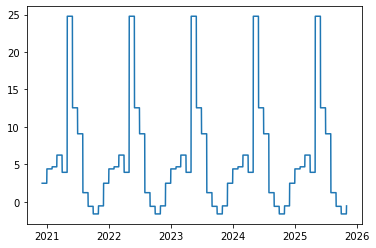

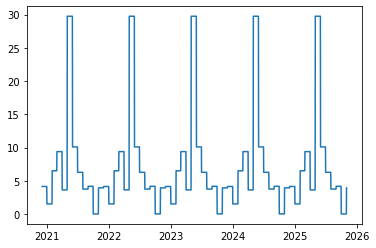

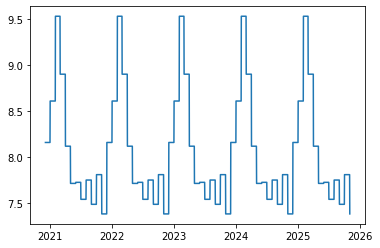

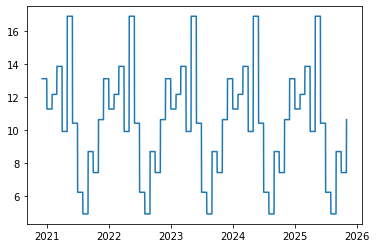

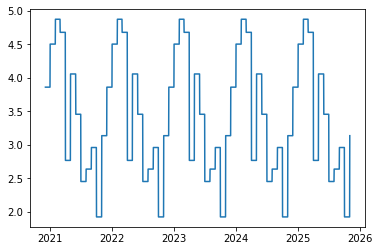

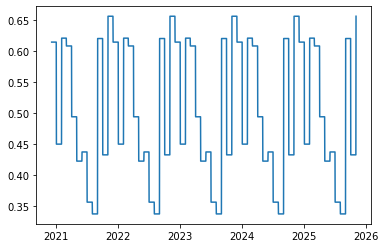

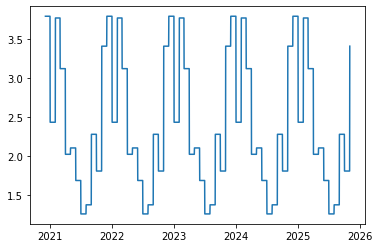

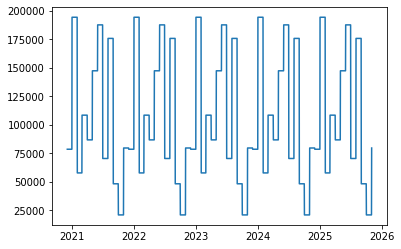

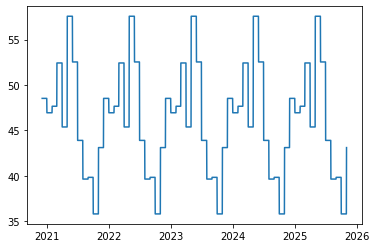

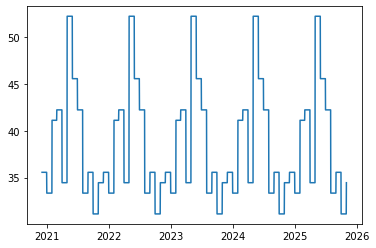

In [ ]:
start = test_data['dates'].iloc[-1]
end = '2025-11-01'
future = pd.date_range(start,end)
future_df = pd.DataFrame(future, columns=['dates'])
x_forecast = create_features(future_df)

f = model.predict(x_forecast)
f2 = model2.predict(x_forecast)
f3 = model3.predict(x_forecast)
#f4 = model4.predict(x_forecast)
f5 = model5.predict(x_forecast)
f6 = model6.predict(x_forecast)
f7 = model7.predict(x_forecast)
f8 = model8.predict(x_forecast)
f9 = model9.predict(x_forecast)
f10 = model10.predict(x_forecast)

plt.plot(future_df, f, label='forecast')
plt.show()

plt.plot(future_df, f2, label='forecast')
plt.show()

plt.plot(future_df, f3, label='forecast')
plt.show()

#plt.plot(future_df, f4, label='forecast')
#plt.show()

plt.plot(future_df, f5, label='forecast')
plt.show()

plt.plot(future_df, f6, label='forecast')
plt.show()

plt.plot(future_df, f7, label='forecast')
plt.show()

plt.plot(future_df, f8, label='forecast')
plt.show()

plt.plot(future_df, f9, label='forecast')
plt.show()

plt.plot(future_df, f10, label='forecast')
plt.show()

temp = pd.DataFrame((f, f2, f3,[0] * len(f), f5, f6, f7, f8, f9)).T
value = temp.apply(lambda x: calculate_wqi(x[0], x[1], x[2],
                                             x[3], x[4], x[5], x[6],
                                             x[7], x[8]), axis=1).values
plt.plot(future_df, value, label='forecast')
plt.show()

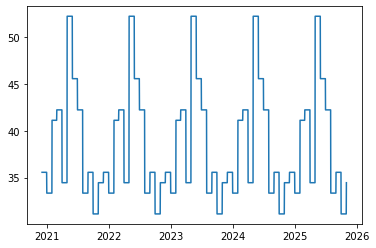

In [ ]:
value = temp.apply(lambda x: calculate_wqi(x[0], x[1], x[2],
                                             x[3], x[4], x[5], x[6],
                                             x[7], x[8]), axis=1).values
plt.plot(future_df, value, label='forecast')

In [ ]:
print(temp)
print(test_data.dates)

             0         1         2    3          4         5         6  \
0     2.463330  4.161989  8.159285  0.0  13.129719  3.861710  0.614578   
1     2.463330  4.161989  8.159285  0.0  13.129719  3.861710  0.614578   
2     2.463330  4.161989  8.159285  0.0  13.129719  3.861710  0.614578   
3     2.463330  4.161989  8.159285  0.0  13.129719  3.861710  0.614578   
4     2.463330  4.161989  8.159285  0.0  13.129719  3.861710  0.614578   
...        ...       ...       ...  ...        ...       ...       ...   
1789 -1.634767  0.037473  7.809458  0.0   7.426307  1.922975  0.432470   
1790 -1.634767  0.037473  7.809458  0.0   7.426307  1.922975  0.432470   
1791 -1.634767  0.037473  7.809458  0.0   7.426307  1.922975  0.432470   
1792 -1.634767  0.037473  7.809458  0.0   7.426307  1.922975  0.432470   
1793 -0.562206  3.955227  7.382595  0.0  10.644068  3.136669  0.656350   

             7             8  
0     3.796812  78483.468750  
1     3.796812  78483.468750  
2     3.796812  78

In [ ]:
temp

,0,1,2,3,4,5,6,7,8
0,2.463330,4.161989,8.159285,0.0,13.129719,3.861710,0.614578,3.796812,78483.468750
1,2.463330,4.161989,8.159285,0.0,13.129719,3.861710,0.614578,3.796812,78483.468750
2,2.463330,4.161989,8.159285,0.0,13.129719,3.861710,0.614578,3.796812,78483.468750
3,2.463330,4.161989,8.159285,0.0,13.129719,3.861710,0.614578,3.796812,78483.468750
4,2.463330,4.161989,8.159285,0.0,13.129719,3.861710,0.614578,3.796812,78483.468750
...,...,...,...,...,...,...,...,...,...
1789,-1.634767,0.037473,7.809458,0.0,7.426307,1.922975,0.432470,1.805567,20900.640625
1790,-1.634767,0.037473,7.809458,0.0,7.426307,1.922975,0.432470,1.805567,20900.640625
1791,-1.634767,0.037473,7.809458,0.0,7.426307,1.922975,0.432470,1.805567,20900.640625
1792,-1.634767,0.037473,7.809458,0.0,7.426307,1.922975,0.432470,1.805567,20900.640625


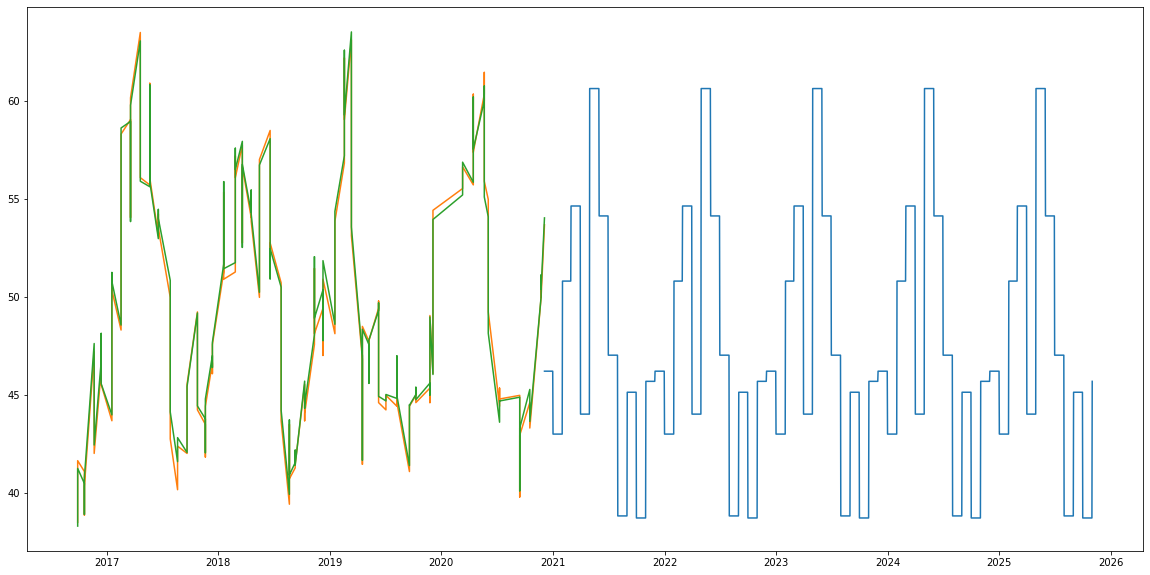

In [ ]:
riverm['dates'] = pd.to_datetime(riverm['dates'])
riverm = riverm.sort_values('dates')

window = 6

# splitting the data into train and test
train_size = int(len(riverm) * 0.8)
train_data = riverm.iloc[:train_size]
test_data = riverm.iloc[train_size:]

X_train = train_data.drop(columns=['WQI', 'dates'])
y_train = train_data['WQI']
X_test = test_data.drop(columns=['WQI', 'dates'])
y_test = test_data['WQI']

model_full = xgb.XGBRegressor(objective='reg:squarederror',
                         n_estimators=1000,
                         learning_rate=0.05,
                         max_depth=3)

model_full.fit(X_train, y_train)
temp.columns = ['turbidity_ntu', 'ss', 'dissolved_oxygen', 'bod5', 'cod', 't_carbon', 't_phosphorus', 't_nitrogen', 'faecal_coliform']
test_preds_from_wqi_model = model_full.predict(X_test)
full_fut = model_full.predict(temp)


plt.figure(figsize=(20, 10))
plt.plot(future_df, full_fut, label='forecast')
plt.plot()
plt.plot(test_data.dates, test_data.WQI.rolling(window).mean())

test_preds_from_wqi_model = pd.DataFrame(test_preds_from_wqi_model)

plt.plot(test_data.dates, test_preds_from_wqi_model.rolling(window).mean())
# apply rolling mean to test_preds_from_dates


plt.show()

In [ ]:
model_full2 = xgb.XGBRegressor(objective='reg:squarederror',
                         n_estimators=1000,
                         learning_rate=0.05,
                         max_depth=3)



0 turbidity_ntu
1 ss
2 dissolved_oxygen
3 bod5
skipped bod5 predictions
4 cod
5 t_carbon
6 t_phosphorus
7 t_nitrogen
8 faecal_coliform
9 WQI


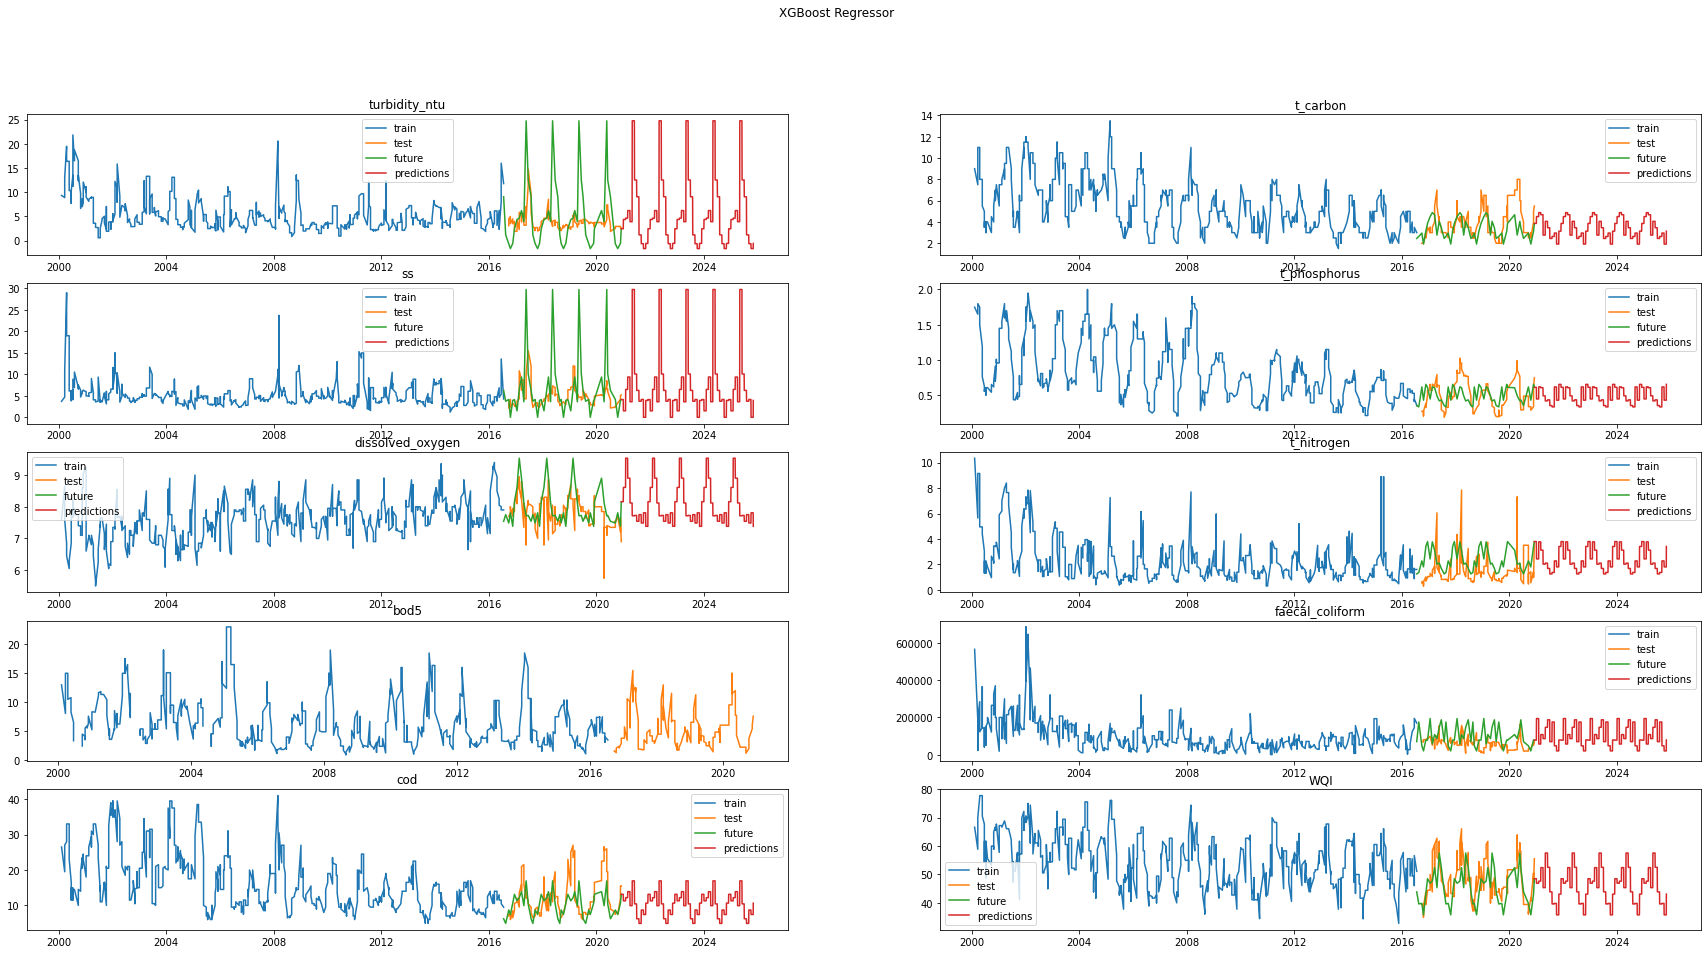

In [ ]:
fig, axs = plt.subplots(5, 2, figsize=(30, 15))
fig.suptitle('XGBoost Regressor')

predictions4 = []

pred_list = [predictions, predictions2, predictions3, predictions4, predictions5, predictions6, predictions7, predictions8, predictions9, predictions10]
pred_dict = {'turbidity_ntu' : predictions,
'ss' : predictions2,
'dissolved_oxygen' : predictions3,
'bod5' : predictions4,
'cod' : predictions5,
't_carbon' : predictions6,
't_phosphorus' : predictions7,
't_nitrogen' : predictions8,
'faecal_coliform' : predictions9,
'WQI' : predictions10}

f4 = []
f_list = [f, f2, f3, f4, f5, f6, f7, f8, f9, f10]

for i, key in enumerate(riverm.keys()[1:]):
    print(i, key)
    axs[i%5,i//5].set_title(key)
    axs[i%5,i//5].set_xlabel('')
    axs[i%5,i//5].set_ylabel('')
    axs[i%5,i//5].plot(train_data.dates, train_data[key].rolling(6).median())
    axs[i%5,i//5].plot(test_data.dates, test_data[key].rolling(6).median())
    if key == 'bod5':
        print('skipped bod5 predictions')
        continue
    axs[i%5,i//5].plot(test_data.dates, pred_dict[key])
    axs[i%5,i//5].plot(future_df, f_list[i])
    axs[i%5,i//5].legend(['train', 'test', 'future', 'predictions'])
plt.show()

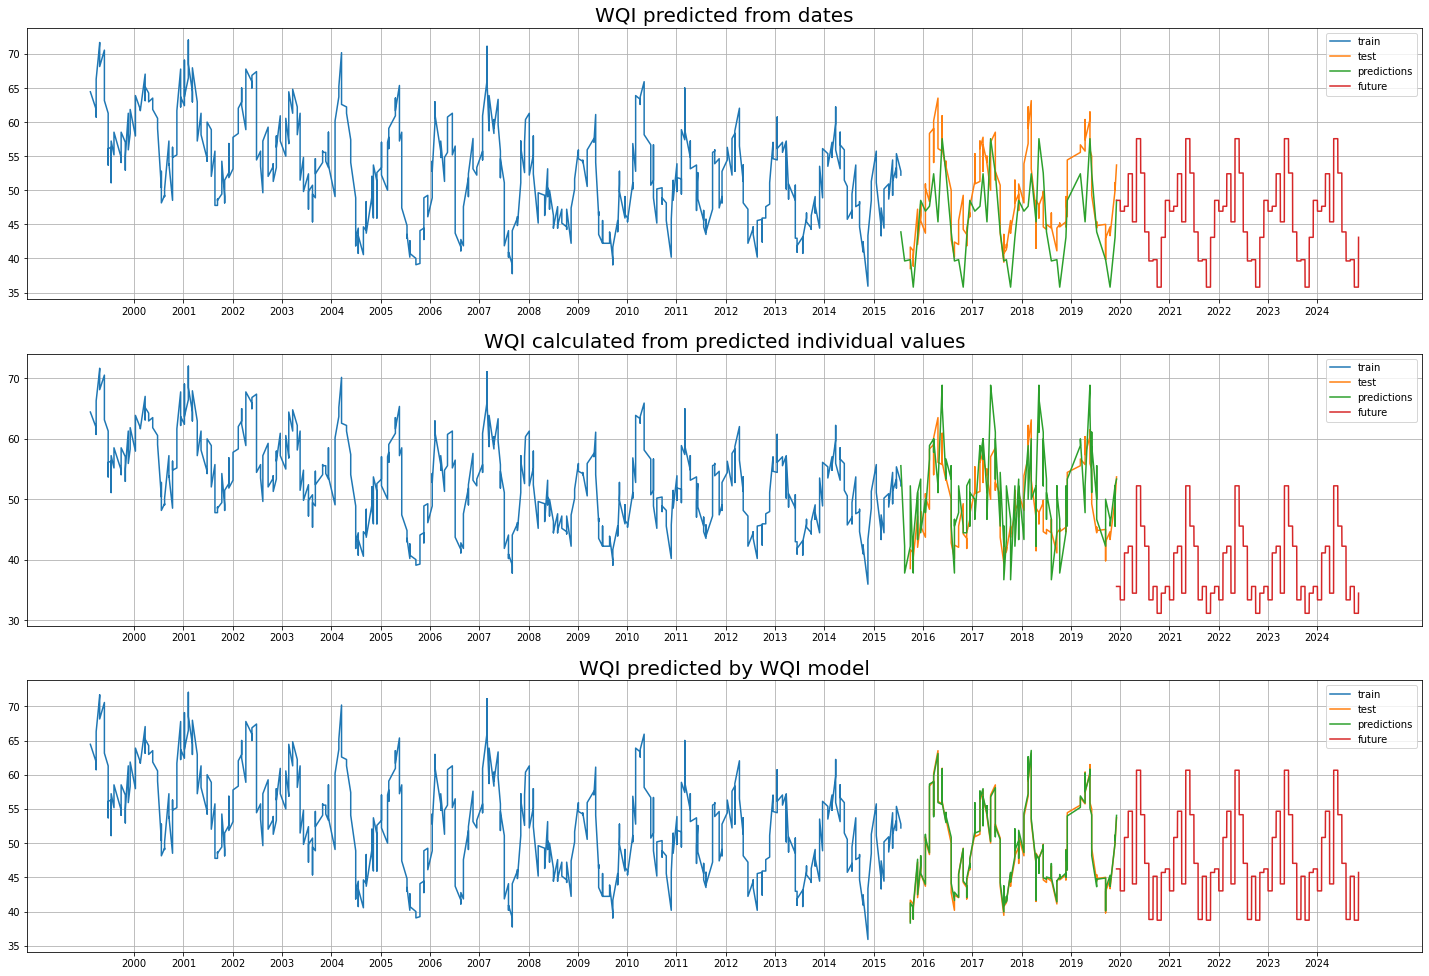

In [ ]:
from matplotlib import dates

fig, axs = plt.subplots(3, 1, figsize=(25, 17))

window = 6


pred_dict = {'turbidity_ntu' : predictions,
'ss' : predictions2,
'dissolved_oxygen' : predictions3,
'bod5' : predictions4,
'cod' : predictions5,
't_carbon' : predictions6,
't_phosphorus' : predictions7,
't_nitrogen' : predictions8,
'faecal_coliform' : predictions9,
'WQI' : predictions10}


axs[0].set_title("WQI predicted from dates", fontsize=20)
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].plot(train_data.dates, train_data.WQI.rolling(window).mean())
axs[0].plot(test_data.dates, test_data.WQI.rolling(window).mean())
axs[0].plot(test_data.dates, pred_dict['WQI'])
axs[0].plot(future_df, f10)
axs[0].legend(['train', 'test', 'predictions', 'future'])
axs[0].grid()
axs[0].set_xticks(pd.date_range(start=riverm['dates'].min(), end=future_df.dates.max(), freq='Y'))
axs[0].xaxis.set_major_formatter(dates.DateFormatter('%Y'))

x = pred_dict
x['bod5'] = test_data['bod5']
x = pd.DataFrame(x)

x['WQI'] = x.apply(lambda x: calculate_wqi(x['turbidity_ntu'], x['ss'], x['dissolved_oxygen'],
                                                x['bod5'], x['cod'], x['t_carbon'], x['t_nitrogen'],
                                                x['t_phosphorus'], x['faecal_coliform']), axis=1)

axs[1].set_title("WQI calculated from predicted individual values", fontsize=20)
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].plot(train_data.dates, train_data.WQI.rolling(window).mean())
axs[1].plot(test_data.dates, test_data.WQI.rolling(window).mean())
axs[1].plot(test_data.dates, x.WQI)
axs[1].plot(future_df, value)
axs[1].legend(['train', 'test', 'predictions', 'future'])
axs[1].grid()
axs[1].set_xticks(pd.date_range(start=riverm['dates'].min(), end=future_df.dates.max(), freq='Y'))
axs[1].xaxis.set_major_formatter(dates.DateFormatter('%Y'))


axs[2].set_title("WQI predicted by WQI model", fontsize=20)
axs[2].set_xlabel('')
axs[2].set_ylabel('')
axs[2].plot(train_data.dates, train_data.WQI.rolling(window).mean())
axs[2].plot(test_data.dates, test_data.WQI.rolling(window).mean())
axs[2].plot(test_data.dates, test_preds_from_wqi_model.rolling(window).mean())
axs[2].plot(future_df, full_fut,)
axs[2].legend(['train', 'test', 'predictions', 'future'])
axs[2].grid()
axs[2].set_xticks(pd.date_range(start=riverm['dates'].min(), end=future_df.dates.max(), freq='Y'))
axs[2].xaxis.set_major_formatter(dates.DateFormatter('%Y'))


